In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import math

from matplotlib import pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('ambient_temperature_system_failure.csv')
df.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


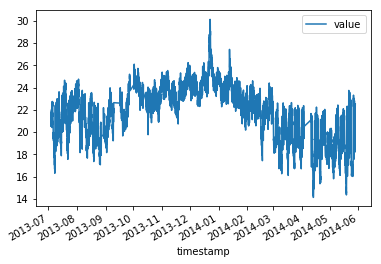

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['value'] = (df['value'] - 32) * 5 / 9
df.plot(x='timestamp', y='value')

In [4]:
df.shape

(7267, 2)

In [5]:
df['hours'] = df['timestamp'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & 
                  (df['hours'] <= 22)).astype(int)
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['weekday'] = (df['dayofweek'] < 5).astype(int)

In [6]:
df

,timestamp,value,hours,daylight,dayofweek,weekday
0,2013-07-04 00:00:00,21.044908,0,0,3,1
1,2013-07-04 01:00:00,21.789015,1,0,3,1
2,2013-07-04 02:00:00,21.598781,2,0,3,1
3,2013-07-04 03:00:00,20.533000,3,0,3,1
4,2013-07-04 04:00:00,20.713084,4,0,3,1
5,2013-07-04 05:00:00,21.144981,5,0,3,1
6,2013-07-04 06:00:00,20.710980,6,0,3,1
7,2013-07-04 07:00:00,20.760894,7,1,3,1
8,2013-07-04 08:00:00,20.648174,8,1,3,1
9,2013-07-04 09:00:00,20.547824,9,1,3,1


In [7]:
data_n = df[['value', 'hours', 'daylight', 
             'dayofweek', 'weekday']]
type(data_n)
min_max_scaler = preprocessing.StandardScaler()
scaled = min_max_scaler.fit_transform(data_n)
data_n = pd.DataFrame(scaled)

In [8]:
x = data_n[:-1].as_matrix()
seqlen = 50
x = [x[i:i + seqlen] for i in range(len(x) - seqlen)]
x = np.asarray(x)
# x.shape = (7216, 50, 5)

In [9]:
y = data_n[1:][0].as_matrix() #y.shape = (7266,)
y = y[-x.shape[0]:]           #y.shape = (7216,)
y = np.reshape(y, (y.shape[0], 1))  #y.shape = (7216,1)

In [10]:
n_test, n_valid = 1000, 500

x_train = x[:-(n_test + n_valid)]
x_valid = x[-(n_test + n_valid):-n_test]
x_test = x[-n_test:]

y_train = y[:-(n_test + n_valid)]
y_valid = y[-(n_test + n_valid):-n_test]
y_test = y[-n_test:]

In [11]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(5716, 50, 5) (5716, 1)
(500, 50, 5) (500, 1)
(1000, 50, 5) (1000, 1)
